In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
df1 = pd.read_csv("A1A2Table1.csv")

In [3]:
df1.columns
# '路面鋪裝', '路面狀態', '路面缺陷', '障礙物', '視距'

Index(['Keyid', 'filename', '事故年月', '總編號', '處理單位代碼', '處理編號', '日期', '時', '分',
       '秒', '縣市', '市區鄉鎮', '村里', '鄰', '街路', '段1', '交叉路', '段2', '巷', '弄', '號前',
       '公尺處', '側', '附近', '地點', '公路', '公里', '公尺', '車道方向', '車道位置', '鐵路線', '鐵路公里',
       '鐵路公尺', '平交道', '死亡', '受傷', '2-30日', '天候', '光線', '道路類別', '速限', '道路型態',
       '事故位置', '路面鋪裝', '路面狀態', '路面缺陷', '障礙物', '視距', '號誌種類', '號誌動作', '分向設施',
       '分道設施-快車道間', '分道設施-快慢車道間', '分道設施-路面邊線', '事故類型及型態', '主要肇事因素', 'NewCity',
       'CASE_NO', '單位', '單位名稱', '權責縣市_Keyid'],
      dtype='object')

In [4]:
con1 = df1.日期 >='2017/1/1'
con2 = df1.公路 == '國道五號'
con3 = df1.公路 == '國道5號'
df = df1[con1 & (con2|con3)]

df.loc[df.事故位置==7, '事故位置'] = '快車道'
df.loc[df.事故位置==14, '事故位置'] = '加速車道'
df.loc[df.事故位置==16, '事故位置'] = '直線匝道'
df.loc[df.事故位置==17, '事故位置'] = '環道匝道'
df.loc[df.事故位置==22, '事故位置'] = '其他'

df.loc[df.道路型態==14, '道路型態'] = '直路'
df.loc[df.道路型態==6, '道路型態'] = '隧道'
df.loc[df.道路型態==10, '道路型態'] = '高架道路'
df.loc[df.道路型態==15, '道路型態'] = '其他'
df.loc[df.道路型態==11, '道路型態'] = '彎曲路及附近'
df.loc[df.道路型態==12, '道路型態'] = '坡路'

df.loc[df.路面鋪裝==1, '路面鋪裝'] = '柏油'
df.loc[df.路面鋪裝==2, '路面鋪裝'] = '水泥'

df.loc[df.路面狀態==4, '路面狀態'] = '濕潤'
df.loc[df.路面狀態==5, '路面狀態'] = '乾燥'

df.loc[df.路面缺陷==2, '路面缺陷'] = '突出'
df.loc[df.路面缺陷==4, '路面缺陷'] = '無缺陷'

df.loc[df.障礙物==1, '障礙物'] = '道路施工'
df.loc[df.障礙物==4, '障礙物'] = '其他障礙物'
df.loc[df.障礙物==5, '障礙物'] = '無障礙物'

df.loc[df.視距==1, '視距'] = '不良（彎道）'
df.loc[df.視距==6, '視距'] = '不良（其他）'
df.loc[df.視距==7, '視距'] = '良好'

df.loc[df.光線==1, '光線'] = '日間自然光線'
df.loc[df.光線==2, '光線'] = '晨或暮光'
df.loc[df.光線==3, '光線'] = '夜間或隧道地下道涵洞、無照明'
df.loc[df.光線==4, '光線'] = '夜間或隧道地下道涵洞、有照明'

df.loc[df.天候==1, '天候'] = '暴雨'
df.loc[df.天候==2, '天候'] = '強風'
df.loc[df.天候==3, '天候'] = '風沙'
df.loc[df.天候==4, '天候'] = '霧或煙'
df.loc[df.天候==5, '天候'] = '雪'
df.loc[df.天候==6, '天候'] = '雨'
df.loc[df.天候==7, '天候'] = '陰'
df.loc[df.天候==8, '天候'] = '晴'

df =df[['Keyid','總編號','日期', '時','公路','公里', '公尺','天候','光線', '車道方向', '車道位置', '速限','道路型態',
    '事故位置', '路面鋪裝', '路面狀態', '路面缺陷', '障礙物', '視距','CASE_NO']]

df.to_csv('filtered.csv', encoding='big5')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
df_state = df.groupby(['車道方向', '車道位置','道路型態', '事故位置', '路面鋪裝', '路面狀態', '路面缺陷', '障礙物', '視距']).count()
df_state

Keyid  總編號  日期  時  公路  公里  \
車道方向 車道位置 道路型態   事故位置 路面鋪裝 路面狀態 路面缺陷 障礙物   視距                                  
北    交流道  彎曲路及附近 環道匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          直路     直線匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          高架道路   快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
     內側   彎曲路及附近 環道匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          直路     快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
                           濕潤   無缺陷  無障礙物  良好          2    2   2  2   2   2   
                 直線匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          隧道     快車道  柏油   乾燥   無缺陷  無障礙物  良好          2    2   2  2   2   2   
     外側   坡路     直線匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          直路     快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
                           濕潤   無缺陷  無障礙物  不良（其他）      1    1   1  1   1   1   
                                           良好          4    4   4  4   4   4   
                 直線匝道 柏油   乾燥   無缺陷  其他障礙物 良好          1    1   1  1   1   1   
          隧道     快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
                                     道路施工  良好          1    1   1  1   1   1   
     路肩   直路     環道匝道 柏油   濕潤   無缺陷  無障礙物  良好          1    1   1  1   1   1   
南    交流道  其他     其他   水泥   乾燥   突出   其他障礙物 良好          1    1   1  1   1   1   
                 直線匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          彎曲路及附近 環道匝道 柏油   濕潤   無缺陷  無障礙物  不良（其他）      1    1   1  1   1   1   
          直路     加速車道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
                 直線匝道 柏油   乾燥   無缺陷  無障礙物  良好          2    2   2  2   2   2   
                           濕潤   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          高架道路   環道匝道 柏油   濕潤   無缺陷  無障礙物  不良（彎道）      1    1   1  1   1   1   
     內側   直路     快車道  柏油   乾燥   無缺陷  無障礙物  良好          2    2   2  2   2   2   
                           濕潤   無缺陷  無障礙物  良好          2    2   2  2   2   2   
                                     道路施工  良好          1    1   1  1   1   1   
          隧道     快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
     外側   直路     快車道  柏油   乾燥   無缺陷  無障礙物  良好          3    3   3  3   3   3   
                                     道路施工  良好          1    1   1  1   1   1   
                           濕潤   無缺陷  無障礙物  良好          2    2   2  2   2   2   
                 直線匝道 柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          隧道     快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
          高架道路   快車道  柏油   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   
     服務區  其他     其他   水泥   乾燥   無缺陷  無障礙物  良好          1    1   1  1   1   1   

                                                   公尺  天候  光線  速限  CASE_NO  
車道方向 車道位置 道路型態   事故位置 路面鋪裝 路面狀態 路面缺陷 障礙物   視距                               
北    交流道  彎曲路及附近 環道匝道 柏油   乾燥   無缺陷  無障礙物  良好       1   1   1   1        1  
          直路     直線匝道 柏油   乾燥   無缺陷  無障礙物  良好       1   1   1   1        1  
          高架道路   快車道  柏油   乾燥   無缺陷  無障礙物  良好       1   1   1   1        1  
     內側   彎曲路及附近 環道匝道 柏油   乾燥   無缺陷  無障礙物  良好       1   1   1   1        1  
          直路     快車道  柏油   乾燥   無缺陷  無障礙物  良好       1   1   1   1        1  
                           濕潤   無缺陷  無障礙物  良好       2   2   2   2        2  
                 直線匝道 柏油   乾燥   無缺陷  無障礙物  良好       1   1   1   1        1  
          隧道     快車道  柏油   乾燥   無缺陷  無障礙物  良好       2   2   2   2        2  
     外側   坡路     直線匝道 柏油   乾燥   無缺陷  無障礙物  良好       1   1   1   1        1  
          直路     快車道  柏油   乾燥   無缺陷  無障礙物  良好       1   1   1   1        1  
                           濕潤   無缺陷  無障礙物  不良（其他）   1   1   1   1        1  
                                           良好       4   4   4   4        4  
                 直線匝道 柏油   乾燥   無缺陷  其他障礙物 良好       1   1   1   1        1  
          隧道   

In [6]:
df_state = df.groupby(['道路型態', '事故位置', '路面鋪裝', '路面狀態', '路面缺陷', '障礙物']).count()
df_state.to_csv('道路狀況組合.csv')

In [7]:
list1 = []

## 月份

In [8]:

for i in range(1,13):
    list1.append(df[df['日期']<='2017/'+str(i)+'/31'].日期.count())

In [9]:
arr1 = np.array(list1)

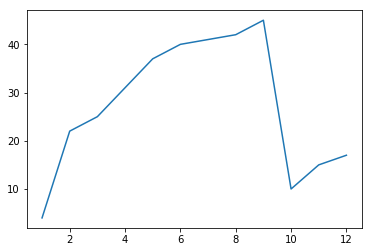

In [10]:
x = np.linspace(1, 12, 12)
plt.plot(x, arr1)

## 小時

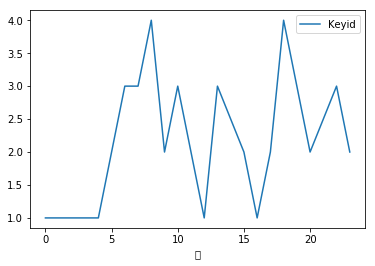

In [11]:
df_hour = df[['時', 'Keyid']]
df_hour.groupby(['時']).count().plot()

## 天候

,Keyid
天候,
晴,22
暴雨,1
陰,10
雨,12


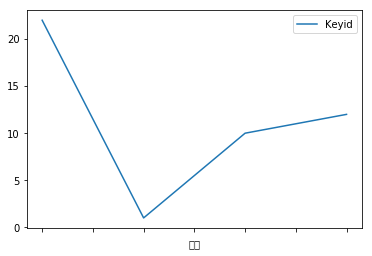

In [12]:
df_weather = df[['天候', 'Keyid']]
df_weather.groupby(['天候']).count().plot(use_index=True)
df_weather.groupby(['天候']).count()

## 光線

,Keyid
光線,
夜間或隧道地下道涵洞、有照明,2
夜間或隧道地下道涵洞、無照明,21
日間自然光線,21
晨或暮光,1


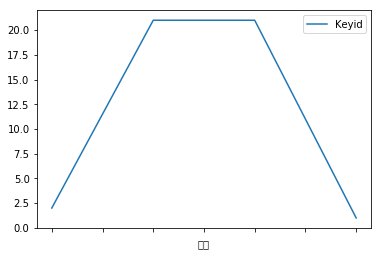

In [13]:
df_weather = df[['光線', 'Keyid']]
df_weather.groupby(['光線']).count().plot()
df_weather.groupby(['光線']).count()

## 星期

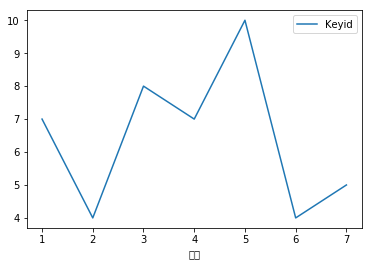

In [14]:
#### df.日期 = datetime.datetime(df.日期).strftime('%W')
weekList = []
for each in df.日期.tolist():
    year,mon,date = [int(i) for i in each.split('/')]
    each = datetime.datetime(year, mon, date).strftime('%a')
    weekList.append(each)
df['星期'] = np.array(weekList)
df_week = df[['Keyid', '星期']]

df_week.loc[df_week.星期=='Fri', '星期'] = 5
df_week.loc[df_week.星期=='Mon', '星期'] = 1
df_week.loc[df_week.星期=='Sat', '星期'] = 6
df_week.loc[df_week.星期=='Sun', '星期'] = 7
df_week.loc[df_week.星期=='Thu', '星期'] = 4
df_week.loc[df_week.星期=='Tue', '星期'] = 2
df_week.loc[df_week.星期=='Wed', '星期'] = 3


df_week.groupby(['星期']).count().plot()

# 違規

In [22]:
df2 = pd.read_csv('天氣違規.csv')
# 幫我跑x=雨量y=違規率和x=氣溫y=違規率的散佈圖+回歸直線
df2.columns

Index(['Unnamed: 0', 'Date', 'Hour', '溫度', '雨量', '違規件數', 'CarNum', '違規率'], dtype='object')

## 相關係數

In [23]:
df2.corr()

,Unnamed: 0,Hour,溫度,雨量,違規件數,CarNum,違規率
Unnamed: 0,1.000000,-0.011752,0.282532,0.121327,-0.019914,-0.017166,0.028114
Hour,-0.011752,1.000000,0.051975,0.055222,0.226479,0.474006,0.080228
溫度,0.282532,0.051975,1.000000,-0.046391,0.000510,0.219333,-0.017853
雨量,0.121327,0.055222,-0.046391,1.000000,0.026272,-0.006046,0.035730
違規件數,-0.019914,0.226479,0.000510,0.026272,1.000000,0.089209,0.889295
CarNum,-0.017166,0.474006,0.219333,-0.006046,0.089209,1.000000,-0.144997
違規率,0.028114,0.080228,-0.017853,0.035730,0.889295,-0.144997,1.000000


## 雨量

In [52]:
x=df2['雨量']
y=df2['違規率']

pandas.core.series.Series

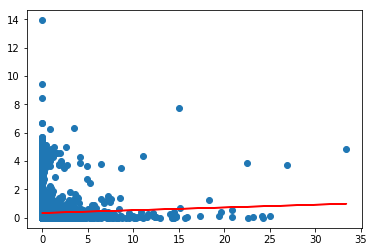

In [53]:
from sklearn.linear_model import LinearRegression
x=x.values.reshape(8660,1)
regr = LinearRegression()
regr.fit(x, y)

plt.scatter(x, y)
plt.plot(x, regr.predict(x),'r')

## 溫度

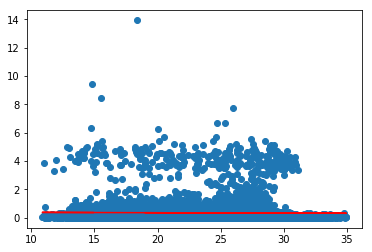

In [57]:
x=df2['溫度']
y=df2['違規率']
x=x.values.reshape(8660,1)
regr = LinearRegression()
regr.fit(x, y)

plt.scatter(x, y)
plt.plot(x, regr.predict(x),'r')